In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t_arr = np.linspace(0, 2*np.pi, 100)
x_arr = np.sin(t_arr)+3

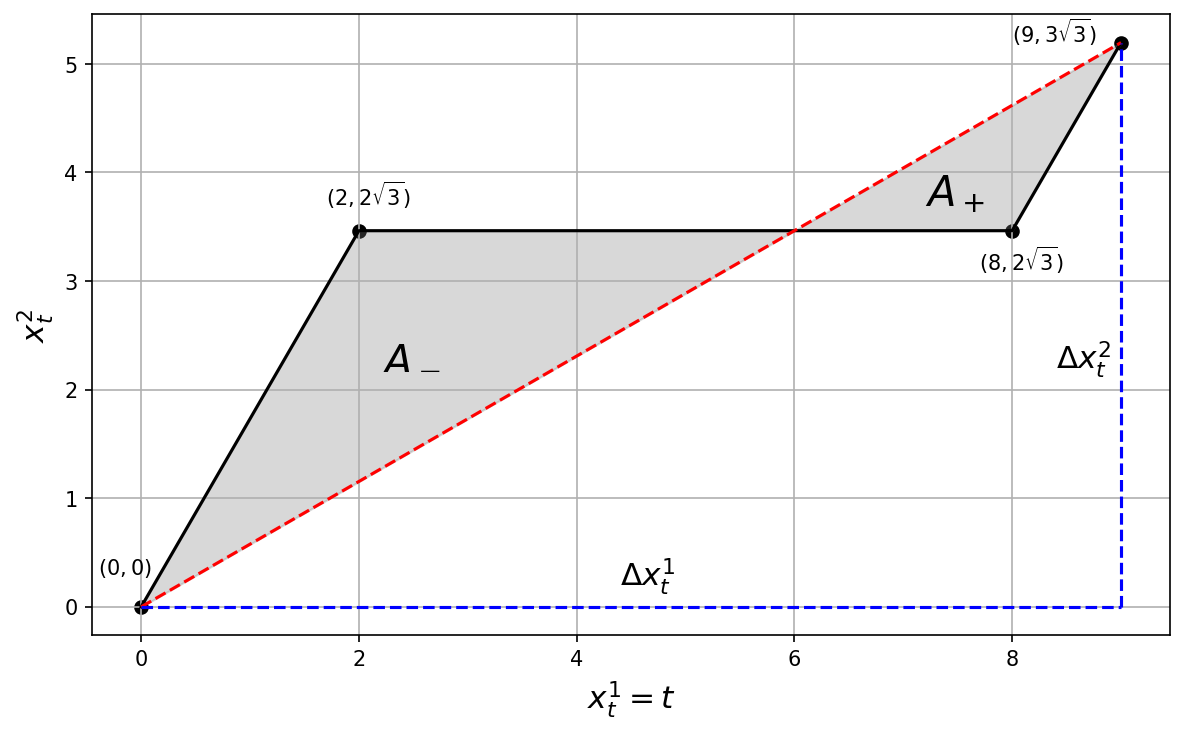

In [89]:
plt.figure(figsize=(8, 5), dpi=150)
plt.plot((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), c='black')
plt.plot((0, 9), (0, 3*3**0.5), color='red', linestyle='dashed')
plt.scatter((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), c='black')
plt.fill_between((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), (0, 2/3**0.5, 2*3**0.5+2/3**0.5, 3*3**0.5),
                 facecolor="orange", # The fill color
                 color='grey',       # The outline color
                 alpha=0.3)
plt.hlines(0, 0, 9, colors='b', linestyles='dashed')
plt.vlines(9, 0, 3*3**0.5, colors='b', linestyles='dashed')
plt.annotate(r'$(0, 0)$', (-0.4, 0.3))
plt.annotate(r'$(2, 2\sqrt{3})$', (1.7, 3.7))
plt.annotate(r'$(8, 2\sqrt{3})$', (7.7, 3.1))
plt.annotate(r'$(9, 3\sqrt{3})$', (8, 5.2))
plt.annotate(r'$\Delta x_t^1$', (4.4, 0.2), fontsize=15)
plt.annotate(r'$\Delta x_t^2$', (8.4, 2.2), fontsize=15)
plt.annotate(r'$A_-$', (2.2, 2.2), fontsize=20)
plt.annotate(r'$A_+$', (7.2, 3.7), fontsize=20)
plt.ylabel(r'$x^2_t$', fontsize=15)
plt.xlabel(r'$x^1_t=t$', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('signed_area.pdf')